In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline
import matplotlib.pyplot as plt

# Task 1

## Data preparation

In [2]:
moons = make_moons(n_samples=10000, noise=0.4)

In [11]:
X = moons[0]
y = moons[1]

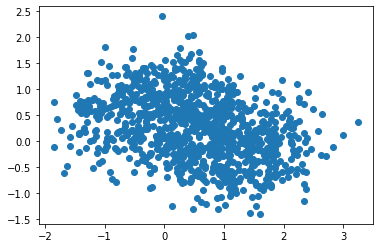

In [16]:
plt.scatter(X[:1000, 0], X[:1000, 1])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [18]:
grid_params = [
    {'max_leaf_nodes': [2, 3, 4, 5, 6]}
]

grid_search = GridSearchCV(DecisionTreeClassifier(), grid_params, cv=5, 
                          scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_leaf_nodes': [2, 3, 4, 5, 6]}],
             return_train_score=True, scoring='accuracy')

In [20]:
grid_search.best_score_

0.853375

In [21]:
grid_search.best_params_

{'max_leaf_nodes': 4}

## Evaluation

In [22]:
best_model = grid_search.best_estimator_

In [23]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4)

In [25]:
y_pred = best_model.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.8555